All instructions are provided for R. I am going to reproduce them in Python as best as I can.

# Preface

From the textbook, p. 370:
> We have seen that we can fit an SVM with a non-linear kernel in order
to perform classification using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


sns.set()
%matplotlib inline

# (a)

From the textbook, p. 371:
> Generate a data set with $n = 500$ and $p = 2$, such that the observations belong to two classes with a quadratic decision boundary between them. For instance, you can do this as follows:
```
> x1 = runif(500) - 0.5
> x2 = runif(500) - 0.5
> y = 1*(x1^2 - x2^2 > 0)
```

In [2]:
np.random.seed(1)
x1 = np.random.uniform(size=500) - 0.5
x2 = np.random.uniform(size=500) - 0.5
y = np.where(x1**2 - x2**2 > 0, 1, 0)

# (b)

From the textbook, p. 371:
> Plot the observations, colored according to their class labels. Your plot should display $X_1$ on the x-axis, and $X_2$ on the y-axis.

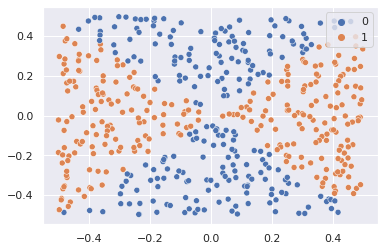

In [3]:
sns.scatterplot(x=x1, y=x2, hue=y)

# (c)

From the textbook, p. 371:
> Fit a logistic regression model to the data, using $X_1$ and $X_2$ as predictors.

In [4]:
data = pd.DataFrame({'x1' : x1
                     , 'x2' : x2
                     , 'y' : y
                    })
x = data.drop('y', axis='columns')

model_c = LogisticRegression()
model_c.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# (d)

From the textbook, p. 371:
> Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be linear.

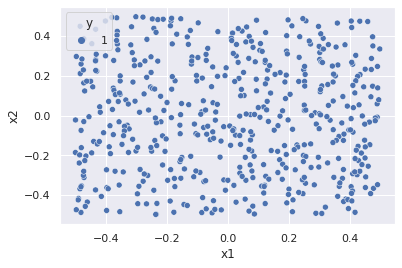

In [5]:
pred_model_c = model_c.predict(x)
sns.scatterplot(x='x1'
                , y='x2'
                , hue='y'
                , data=data.assign(y=pred_model_c)
               )

The model decided to classify all points as ones.

# (e)

From the textbook, p. 371:
> Now fit a logistic regression model to the data using non-linear functions of $X_1$ and $X_2$ as predictors (e.g. $X_1^2$, $X_1 \cdot X_2$, $\log(X_2)$, and so forth).

I don't want to use logs or square roots, because there are negative values in the dataset.

In [6]:
data['x1x2'] = data.x1 * data.x2
data['x1^2'] = data.x1**2
data['x2^2'] = data.x2**2
data['cbrt(x1)'] = np.cbrt(data.x1)
data['cbrt(x2)'] = np.cbrt(data.x2)
x = data.drop('y', axis='columns')

model_e = LogisticRegression()
model_e.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# (f)

From the textbook, p. 371:
> Apply this model to the training data in order to obtain a predicted class label for each training observation. Plot the observations, colored according to the predicted class labels. The decision boundary should be obviously non-linear. If it is not, then repeat (a)-(e) until you come up with an example in which the predicted class labels are obviously non-linear.

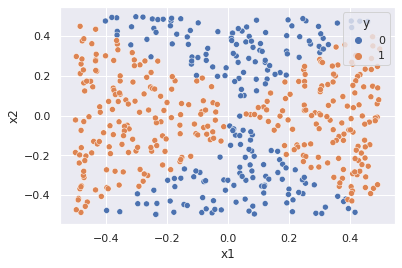

In [7]:
pred_model_e = model_e.predict(x)
sns.scatterplot(x='x1'
                , y='x2'
                , hue='y'
                , data=data.assign(y=pred_model_e)
               )

Not bad, actually.

# (g)

From the textbook, p. 371:
> Fit a support vector classifier to the data with $X_1$ and $X_2$ as predictors. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

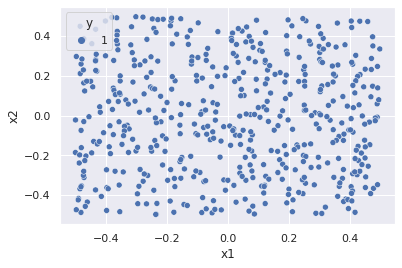

In [8]:
model_g = SVC(kernel='linear')
model_g.fit(data[['x1', 'x2']], y)
pred_model_g = model_g.predict(data[['x1', 'x2']])
sns.scatterplot(x='x1'
                , y='x2'
                , hue='y'
                , data=data.assign(y=pred_model_g)
               )

Same thing as with plain logistic regression.

# (h)

From the textbook, p. 371:
> Fit a SVM using a non-linear kernel to the data. Obtain a class prediction for each training observation. Plot the observations, colored according to the predicted class labels.

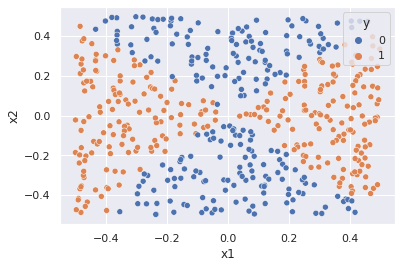

In [9]:
model_h = SVC(kernel='rbf')
model_h.fit(data[['x1', 'x2']], y)
pred_model_h = model_h.predict(data[['x1', 'x2']])
sns.scatterplot(x='x1'
                , y='x2'
                , hue='y'
                , data=data.assign(y=pred_model_h)
               )

Looks reasonable.

# (i)

From the textbook, p. 371:
> Comment on your results.

In [10]:
print(f'Accuracy of logistic regression with non-linear predictors: {model_e.score(x, y)}')
print(f"Accuracy of SVM with RBF kernel: {model_h.score(data[['x1', 'x2']], y)}")

Accuracy of logistic regression with non-linear predictors: 0.934
Accuracy of SVM with RBF kernel: 0.986


SVM with RBF kernel has greater accuracy on the training dataset than logistic regression with non-linear predictors.